# Task 3: Customer Segmentation / Clustering

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [2]:
# Loading datasets
customers_df = pd.read_csv("Customers.csv")  # Customer details
transactions_df = pd.read_csv("Transactions.csv")  # Transaction details


In [3]:
# Merge the datasets to create a customer-product interaction dataset
transactions_with_customer = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")


In [4]:
transactions_with_customer.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


### Feature engineering:

In [6]:
# Aggregating transaction data to create meaningful features (e.g., total spent, number of purchases, etc.)
customer_profile = transactions_with_customer.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    NumPurchases=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean')
).reset_index()

In [7]:
# Standardizing the data
scaler = StandardScaler()
customer_profile_scaled = scaler.fit_transform(customer_profile[['TotalSpent', 'NumPurchases', 'AvgTransactionValue']])

In [8]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Let's assume 4 clusters for this example
customer_profile['Cluster'] = kmeans.fit_predict(customer_profile_scaled)


In [9]:
# Adding cluster labels back to the customer profile dataframe
customer_profile['Cluster'] = kmeans.labels_

In [10]:
# Clustering metrics - Davies-Bouldin Index
db_index = davies_bouldin_score(customer_profile_scaled, customer_profile['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.0604240399923033


In [11]:
# Visualizing clusters - 2D plot (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

In [12]:
# Perform PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_profile_scaled)

In [13]:
# Adding PCA components to the dataframe for plotting
customer_profile['PCA1'] = pca_components[:, 0]
customer_profile['PCA2'] = pca_components[:, 1]


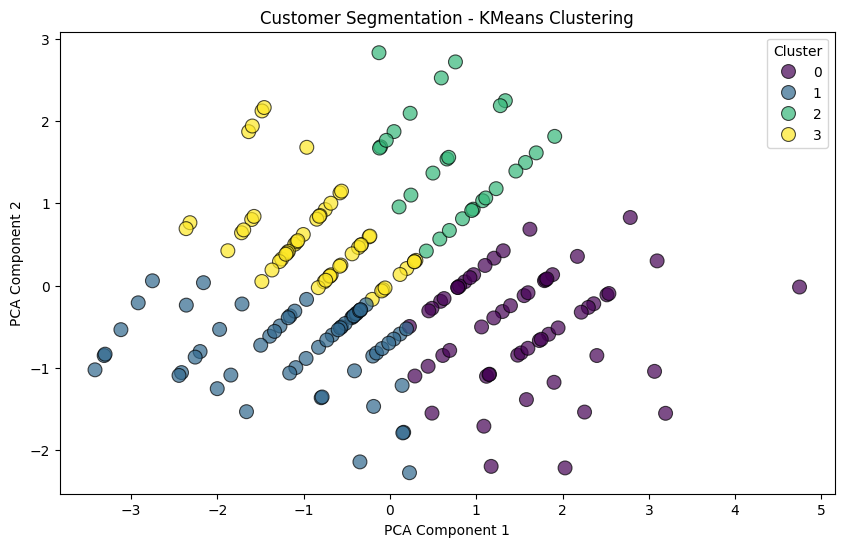

In [14]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_profile, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('Customer Segmentation - KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

In [15]:
#  Number of clusters and other relevant metrics
num_clusters = len(customer_profile['Cluster'].unique())
print(f'Number of Clusters: {num_clusters}')

Number of Clusters: 4
